# 3. Low Risk Factor 저위험 팩터

----------------

참고 문헌 및 참고 사이트
1. Ang, A., Hodrick, R. J., Xing, Y., & Zhang, X. (2009). High idiosyncratic volatility and low returns: International and further US evidence. Journal of Financial Economics, 91(1), 1-23.  
2. Chow, T. M., Hsu, J. C., Kuo, L. L., & Li, F. (2014). A Study of Low-Volatility PortfolioConstruction Methods. The Journal of Portfolio Management, 40(4), 89-105.
3. 고봉찬, & 김진우. (2014). 저변동성 이상현상과 투자전략의 수익성 검증. 한국증권학회지, 43(3), 573-603.
4. 이스트스프링자산운용코리아 https://www.eastspringinvestments.co.kr/insights/low-volatility-anomaly

저변동성 이상현상이란,  
더 낮은 변동성을 가진 주식들이 더 높은 변동성을 가진 주식들과 대등한 성과,  
심지어는 장기적으로는 더 높은 성과를 구현한다는 점을 설명하며, 전통적인 금융 이론에 반기를 가지는 이론이다.  
  
  위 참고자료를 통해, 저변동성 이상현상은 '특정 기간에만 관찰'할 수 있는 현상임을 확인했으며,  
  해당 현상을 확인하기 위해 1976년~2018년 까지의 미국 시가총액 상위 500개 종목을 사용한다.

---------------------

* BackTesting : 실제 미국 시장에서의 저변동성 효과 확인을 위해 백테스트 활용하여 검증

* Methodology 활용 데이터 : S&P500 1973~2018까지 월별 데이터가 존재하는 종목 사용
* step 01 ) 현재시점 t에서 과거 n개월 기준으로 수익률의 표준편차 계산
* step 02 ) 계산된 표준편차가 가장 작은 종목부터 가장 큰 종목까지의 순서를 활용하여 각 N개의 포트폴리오에 포함될 개별자산 선정
* step 03 ) 향후 투자기간 k에 대하여 t + k 시점까지 투자할 포트폴리오 N개를 위 방법을 통해 구성
* 위 작업을 k기간 마다 반복하여 Rebalancing
* 구성된 포트폴리오의 투자 수익률 그래프 시각화

## 3.1. 데이터 불러오기

In [1]:
import pandas as pd
from scipy import stats, polyval, polyfit
from pylab import plot, title, show, legend
import FinanceDataReader as fdr
import numpy as np

In [2]:
# 데이터 불러오기
sp = pd.read_csv('./sp_monthly_returns_1973_2018.csv') 

# 인덱스 설정
sp = sp.set_index('Date')

sp 

,JNJ,XOM,PG,LLY,CVX,MRK,PEP,KO,WMT,BAC,...,SNA,EVRG,LNT,IP,PNR,NI,PNW,CPB,WHR,FRT
Date,,,,,,,,,,,,,,,,,,,,,
1973-06-30,-0.003282,-0.001267,0.007264,0.004510,0.009836,-0.011004,0.000000,0.007923,0.008328,0.003663,...,-0.008929,-0.015385,0.000000,-0.010831,0.000000,-0.005291,0.024096,-0.025105,0.000000,0.000000
1973-07-31,0.003185,-0.014157,0.013437,-0.011189,-0.013629,0.001346,-0.013024,-0.006041,0.032262,0.000000,...,-0.009133,-0.020726,0.000000,-0.006536,0.013332,0.000000,-0.006136,0.000000,-0.031746,0.000000
1973-08-31,0.007407,0.001408,0.010256,-0.022508,-0.005714,-0.010097,-0.004021,-0.009667,0.011994,0.006579,...,0.012931,-0.022599,-0.006623,0.002816,0.000000,-0.012988,0.000000,-0.008404,-0.004202,0.000000
1973-09-30,-0.004202,-0.014589,0.002531,0.000000,-0.019469,-0.015037,0.000000,0.005156,0.000000,0.000000,...,-0.004000,-0.026456,-0.006329,-0.010526,0.000000,0.023256,0.017543,0.019607,-0.037313,0.000000
1973-10-31,-0.009221,-0.010471,-0.001211,-0.006051,-0.041522,-0.030986,0.000000,-0.009549,-0.020843,-0.015674,...,-0.004256,-0.017341,0.000000,-0.012048,0.000000,-0.006370,0.000000,0.007812,-0.008265,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-31,0.002648,-0.002814,0.008479,0.008060,-0.012204,0.016356,0.007182,0.008652,0.003938,-0.013734,...,0.013506,0.012272,0.015599,0.018578,0.029514,0.017885,0.010999,-0.000977,0.025020,0.024992
2018-08-31,-0.001927,-0.004223,-0.005515,0.001612,-0.011268,0.000729,0.000446,-0.008454,-0.002497,-0.002580,...,-0.009414,-0.005231,-0.003489,-0.011405,0.002767,-0.002946,-0.002033,0.007663,-0.011625,0.003997
2018-09-30,-0.000362,-0.008744,0.004465,0.005811,-0.001551,0.003111,0.006754,0.003912,-0.002337,-0.016032,...,-0.003474,0.011232,0.012126,-0.021501,-0.002990,0.005650,0.013958,-0.006240,-0.001598,0.018195


## 3.2. Slicing Tools

* 각 과거 데이터에 대한 과거 수익률을 얻기 위해 rebalancing(투자비중 조정) 시기마다의 backtesting 기간 데이터를 slicing하기 위한 인덱스 순서를 뽑아주는 함수 정의
* Backtesting 에 활용할 기간을 입력하면(times) 해당 기간(times)에 맞게 backtesing 시작 기간과 끝 기간의 리스트 반환해주는 함수

In [3]:
def how_many_times(data, times, rebal = 1):
    #repet_times = len(data)-times
    start_period = np.array(list(map(lambda x: x, range(len(data.index)-times+1))))
    end_period = np.array(list(map(lambda x: x+times-1, range(len(data.index)-times+1))))
    
    period_list = list(map(lambda x: x*rebal, range(int(np.ceil(len(start_period)/rebal)))))
    return start_period[period_list], end_period[period_list] 

* 60개월의 데이터를 이용하여 backtesting 진행
* 3개월마다 동일 작업 반복 -> 3개월마다 rebalnacing하는 경우를 산정한 예시에서는 S&P500의 index를 추출하기 위한 리스트 반환

In [4]:
start_period, end_period = how_many_times(sp, 60, 3)

end_period

array([ 59,  62,  65,  68,  71,  74,  77,  80,  83,  86,  89,  92,  95,
        98, 101, 104, 107, 110, 113, 116, 119, 122, 125, 128, 131, 134,
       137, 140, 143, 146, 149, 152, 155, 158, 161, 164, 167, 170, 173,
       176, 179, 182, 185, 188, 191, 194, 197, 200, 203, 206, 209, 212,
       215, 218, 221, 224, 227, 230, 233, 236, 239, 242, 245, 248, 251,
       254, 257, 260, 263, 266, 269, 272, 275, 278, 281, 284, 287, 290,
       293, 296, 299, 302, 305, 308, 311, 314, 317, 320, 323, 326, 329,
       332, 335, 338, 341, 344, 347, 350, 353, 356, 359, 362, 365, 368,
       371, 374, 377, 380, 383, 386, 389, 392, 395, 398, 401, 404, 407,
       410, 413, 416, 419, 422, 425, 428, 431, 434, 437, 440, 443, 446,
       449, 452, 455, 458, 461, 464, 467, 470, 473, 476, 479, 482, 485,
       488, 491, 494, 497, 500, 503, 506, 509, 512, 515, 518, 521, 524,
       527, 530, 533, 536, 539, 542, 545])

* 위에서 기간을 slicing 하기 위해 함수 정의한 것과 같이 각 pfo에 편입될 개별 주식들을 slicing 하기 위한 함수 구성
* 주어진 데이터(data)와 몇개의 그룹(포트폴리오)으로 나눌지(many)를 입력하면,각 그룹(pfo)에 속하는 주식들의 시작 인덱스와 끝 인덱스를 반환해주는 함수 

In [5]:
def how_many_stocks(data, many):
    N = len(data.columns)
    num_of_stock = int(N/many)
    
    initial = list(map(lambda many: (num_of_stock*many), range(many)))
    end = list(map(lambda many: num_of_stock+(num_of_stock*many), range(many)))

    if end[-1] != N:
        end[-1] = N-1
        
    return initial, end

* 5개의 pfo 구성 시, slicing하기 위해 얻을 수 있는 column index의 순서 리스트 반환

In [6]:
initial, end = how_many_stocks(sp, 5)

print(initial)
print('------------------------')
print(end)

[0, 16, 32, 48, 64]
------------------------
[16, 32, 48, 64, 83]


## 3.3. Calculation Tools

* 3.3.1. backtesting에 활용할 수익률과 이후 투자기간에 대한 데이터를 각 데이터프레임 형태를 통해 input data로 받으면 N개의 pfo 구성기준(표준편차)에 따라 각 pfo에 편입될 자산들만을 포함한 dataframe N개를 리스트 형태로 반환
* 주어진 2개의 데이터프레임(data, data2)과 시작 인덱스(initial), 끝 인덱스(end)를 입력하면, 주식들을 표준편차 기준으로 정렬하여 그룹화한 후, 각 그룹에 해당하는 주식들의 데이터를 리스트로 반환

In [7]:
def df_return(data, data2, initial, end):
    split_std = np.std(data)
    std_sort = split_std.sort_values()
    std_index = list(std_sort.index)
    
    df_list = list()
    for j in range(len(end)):
        stock_split_list = std_index[initial[j]:end[j]]
        stock_split_data = data2[stock_split_list]
        df_list.append(stock_split_data)
        
    return df_list

* 3.3.2. 각 pfo에 속하는 자산들만을 포함한 dataframe리스트를 입력받아 해당 pfo의 구성방식의 형태로 수익률을 계산하여 각 pfo의 해당 투자기간 동안의 수익률을 반환하는 함수 정의
* 주어진 데이터(list_data)를 기반으로 pfo 생성하는 함수, 생성된 데이터프레임은 각 pfo의 수익률 정보가 담겨있음

In [8]:
def portfolio_generater(list_data, method = 'eq'):
                                    # 'eq' : 각 데이터의 평균으로 pfo 생성
    portfolio_df = pd.DataFrame()
    for i in range(len(list_data)):
        ret_data = list_data[i]+1
        portfolio = np.mean(np.cumprod(ret_data), axis=1)
        
        num_port = 'portfolio'+str(i+1)
        portfolio_df.loc[:,num_port] = portfolio[-1:]
    return portfolio_df

## 3.4. Backtesting Function

* 3.2. Slicing Tools, 3.3. Calculation Tools에서 구성한 함수를 통하여 Backtesting하는 함수 정의  
: 데이터, backtesting에 활용할 기간, rebalancig기간, pfo의 수를 입력으로 받아 전체 기간에서의 backtesting을 통한 각 pfo의 수익률을 values로 가지는 DataFrame 반환


* 주어진 데이터(data)를 기간(times)만큼씩 분할
* 분할된 기간 내에서 주식들을 그룹 수(many)만큼 나눔
* 각 그룹별(many)별로 수익률 계산하여 pfo 생성
* 각 기간(times)별로 생성된 pfo를 합쳐 하나의 데이터프레임으로 반환
* => 각 기간별로 그룹화된 pfo 수익률 데이터

In [9]:
def period_split_std(data, times, rebal, many):
    start_period, end_period = how_many_times(data, times, rebal)
    initial, end = how_many_stocks(data, many)
    
    total_list = list()
    
    for i in range(len(start_period)-1):
        data_split = data.loc[data.index[start_period[i]]:data.index[end_period[i]]]
        data_split_plus = data.loc[data.index[start_period[i+1]]:data.index[end_period[i+1]]]
        data_split_2 = data_split_plus.loc[data_split_plus.index[-rebal]:,]
        
        list_data = df_return(data_split, data_split_2, initial, end)
        
        n_period_port = portfolio_generater(list_data, rebal)
        
        total_list.append(n_period_port)
    
    result = pd.concat(total_list)
    
    return result

## 3.5. Backtesting

In [10]:
# backtesting 기간 : 60개월
# 3개월마다 rebalancing 
# 8개의 pfo 수익률 반환
portfolio_ret = period_split_std(sp, 60, 3, 8)
portfolio_ret.head()

,portfolio1,portfolio2,portfolio3,portfolio4,portfolio5,portfolio6,portfolio7,portfolio8
Date,,,,,,,,
1978-08-31,0.995106,1.005176,1.010217,1.013656,1.005536,1.002770,1.010975,0.997657
1978-11-30,0.983199,0.989557,0.996472,1.000748,0.984559,0.997487,1.005169,1.000105
1979-02-28,0.993979,0.988687,0.992176,1.000719,0.986457,0.978382,0.977636,1.003492
1979-05-31,1.000456,0.995096,0.996226,0.992298,1.000083,1.000090,0.990026,0.996170
1979-08-31,0.996700,1.003382,1.006125,1.011915,1.009944,1.013141,1.008410,1.011663


In [11]:
portfolio_ret.tail()

,portfolio1,portfolio2,portfolio3,portfolio4,portfolio5,portfolio6,portfolio7,portfolio8
Date,,,,,,,,
2017-11-30,1.015069,1.011034,1.004256,1.007815,1.018182,1.008207,1.014997,1.010635
2018-02-28,0.983459,0.988770,0.990361,0.991335,0.995639,0.990432,0.974339,0.980277
2018-05-31,0.996905,0.991371,0.994121,0.991195,0.994147,0.997386,0.990618,0.991566
2018-08-31,1.013587,1.010513,1.009707,1.014368,1.006617,1.017311,1.008072,1.000119
2018-11-30,0.991446,1.004813,0.999437,1.002355,1.005269,1.012742,1.003788,0.988447


In [12]:
# 각 포트폴리오의 변동성(표준편차) 확인
portfolio_ret.std()

portfolio1    0.015077
portfolio2    0.014218
portfolio3    0.015217
portfolio4    0.015885
portfolio5    0.016423
portfolio6    0.020225
portfolio7    0.017729
portfolio8    0.020270
dtype: float64

In [13]:
# 컬럼 순서 변경
new_order = ['portfolio2', 'portfolio1', 'portfolio3', 'portfolio4', 'portfolio5', 'portfolio7', 'portfolio6', 'portfolio8']
portfolio_ret = portfolio_ret[new_order]
portfolio_ret

,portfolio2,portfolio1,portfolio3,portfolio4,portfolio5,portfolio7,portfolio6,portfolio8
Date,,,,,,,,
1978-08-31,1.005176,0.995106,1.010217,1.013656,1.005536,1.010975,1.002770,0.997657
1978-11-30,0.989557,0.983199,0.996472,1.000748,0.984559,1.005169,0.997487,1.000105
1979-02-28,0.988687,0.993979,0.992176,1.000719,0.986457,0.977636,0.978382,1.003492
1979-05-31,0.995096,1.000456,0.996226,0.992298,1.000083,0.990026,1.000090,0.996170
1979-08-31,1.003382,0.996700,1.006125,1.011915,1.009944,1.008410,1.013141,1.011663
...,...,...,...,...,...,...,...,...
2017-11-30,1.011034,1.015069,1.004256,1.007815,1.018182,1.014997,1.008207,1.010635
2018-02-28,0.988770,0.983459,0.990361,0.991335,0.995639,0.974339,0.990432,0.980277
2018-05-31,0.991371,0.996905,0.994121,0.991195,0.994147,0.990618,0.997386,0.991566


In [14]:
# 각 포트폴리오의 변동성(표준편차) 확인
portfolio_ret.std()

portfolio2    0.014218
portfolio1    0.015077
portfolio3    0.015217
portfolio4    0.015885
portfolio5    0.016423
portfolio7    0.017729
portfolio6    0.020225
portfolio8    0.020270
dtype: float64

In [15]:
# 누적수익률 계산
invest_df = np.cumprod(portfolio_ret)
invest_df.tail()

,portfolio2,portfolio1,portfolio3,portfolio4,portfolio5,portfolio7,portfolio6,portfolio8
Date,,,,,,,,
2017-11-30,2.009439,1.874118,1.348775,1.167217,1.578729,1.871966,1.401922,1.657308
2018-02-28,1.986873,1.843119,1.335774,1.157103,1.571844,1.823930,1.388509,1.624621
2018-05-31,1.969729,1.837415,1.327922,1.146915,1.562643,1.806817,1.384879,1.610920
2018-08-31,1.990436,1.862380,1.340811,1.163393,1.572984,1.821401,1.408854,1.611112
2018-11-30,2.000016,1.846449,1.340057,1.166133,1.581271,1.828300,1.426805,1.592499


## 3.6. Conclusion

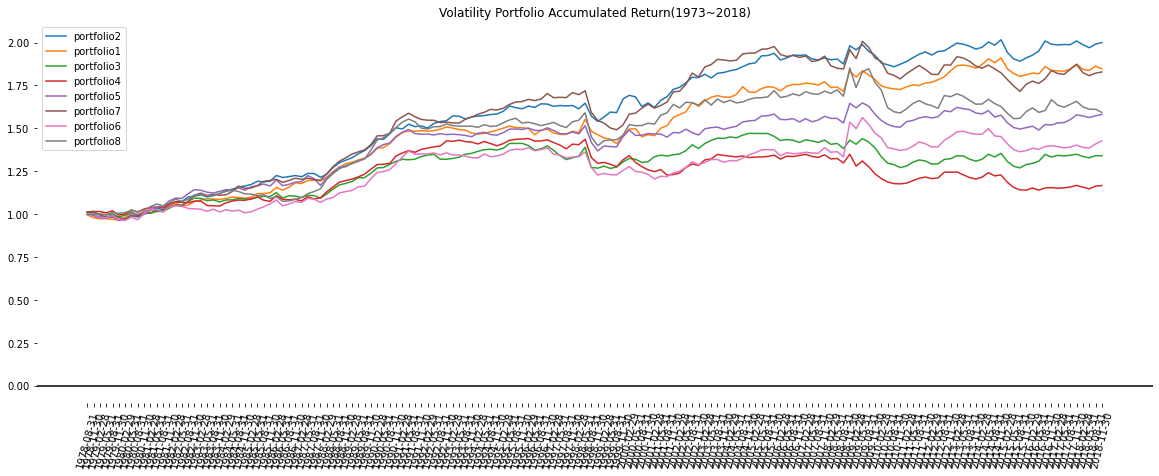

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def cum_plot(data, title):
    # 데이터프레임 복사
    df_copy = data.copy()

    # Period 데이터를 string으로 변환
    df_copy.index = df_copy.index.astype(str)
    
    plt.figure(figsize=(20, 7))
    plt.plot(df_copy)
    plt.title(title)
    plt.axhline(color='k')

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.legend(df_copy.columns.values)
    
    # x축 label 기울이기
    plt.xticks(rotation=75)
    
    plt.show()

# 누적 수익률 시각화
cum_plot(invest_df, "Volatility Portfolio Accumulated Return(1973~2018)")

* 변동성이 낮은 포트폴리오인 portfolio2의 경우 장기적으로 봤을 때 누적수익률이 가장 높게 기록되는 것을 볼 수 있으며, 2번째로 변동성이 작은 portfolio1의 누적수익률이 그 뒤를 잇는 것으로 파악됨
* 이를 통해, 변동성이 낮은 포트폴리오가 변동성이 높은 포트폴리오에 비해 장기적인 관점에서의 수익률이 높게 기록되는 경향이 나타난다는 것을 확인했으며, 저변동성 이상현상을 증명함

출처: 김병규, 이현열 (2017). "Smart Beta, 감정을 이기는 퀀트투자 스마트 베타"